In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\hegde\Downloads\claimants.csv")

In [4]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
mode=df['CLMSEX'].mode()
mode

0    1.0
Name: CLMSEX, dtype: float64

In [8]:
df['CLMSEX'].fillna(1.0,inplace=True)

In [9]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
df['CLMINSUR'].mode()

0    1.0
Name: CLMINSUR, dtype: float64

In [11]:
df['CLMINSUR'].fillna(1.0,inplace=True)

In [12]:
df['SEATBELT'].mode()

0    0.0
Name: SEATBELT, dtype: float64

In [13]:
df['SEATBELT'].fillna(0.0 , inplace=True)

In [14]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [17]:
mean= df['CLMAGE'].mean()
mean

28.414422241529106

In [18]:
df['CLMAGE'].fillna(28.4 , inplace=True)

In [19]:
df.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [20]:
df.corr()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
CASENUM,1.000000,0.011717,0.030946,0.042214,-0.009150,-0.002305,-0.049590
ATTORNEY,0.011717,1.000000,0.076564,0.076631,-0.055848,0.009864,-0.219715
CLMSEX,0.030946,0.076564,1.000000,0.065976,-0.016327,-0.022437,-0.028412
CLMINSUR,0.042214,0.076631,0.065976,1.000000,0.019953,0.044697,0.004641
SEATBELT,-0.009150,-0.055848,-0.016327,0.019953,1.000000,-0.025374,0.111879
CLMAGE,-0.002305,0.009864,-0.022437,0.044697,-0.025374,1.000000,0.057638
LOSS,-0.049590,-0.219715,-0.028412,0.004641,0.111879,0.057638,1.000000


In [27]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [28]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.4,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [29]:
model=LinearRegression()
model=model.fit(X,y)
model.score(X,y)

0.05998828252236832

In [31]:
df.drop(['CASENUM'],inplace=True,axis=1)

In [32]:
df.shape

(1340, 6)

In [33]:
#removing na values in data set
df=df.dropna()
df.shape

(1340, 6)

In [34]:
#Dividing our data into input and output variables
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [35]:
#logistic regression and fit the model
classifier=LogisticRegression()
classifier.fit(X,Y)
classifier.score(X,y)

#classifier.write_to_pickle('path of file.pkl')
#classifier.save('Model.hds')

0.7037313432835821

In [37]:
#predict for X dataset
#pickle.Load(open(filename,'rb'))
#classifier.read_pickle_file('/content/finalized_model.sav')
y_pred=classifier.predict(X)

In [38]:
y_pred_df=pd.DataFrame({'actual':Y,
                       'predicted_prob':classifier.predict(X)})

In [39]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [42]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[435 250]
 [147 508]]


In [43]:
#classification report
##precision -what percent of your predictions were correct?
##recall -what percent of the positive cases did you catch?
##F1 score-what percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [44]:
classifier.predict_proba(X)[:,1]

array([2.58921247e-05, 5.04678193e-01, 5.74918289e-01, ...,
       7.14665590e-01, 3.13341526e-01, 6.61221811e-01])

In [45]:
#roc curve

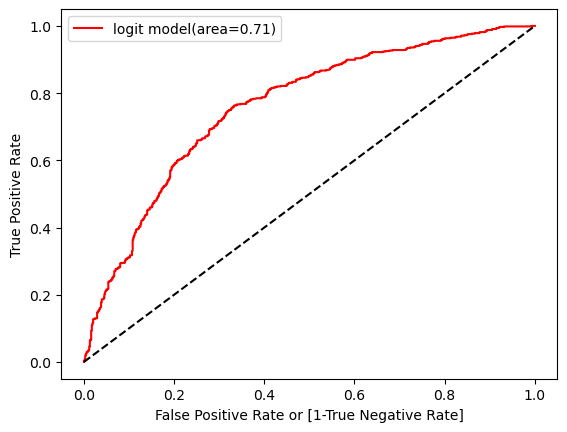

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])

auc=roc_auc_score(Y,y_pred)

plt.plot(fpr,tpr,color='Red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()